In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [82]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Files/project_2_data.csv')

In [83]:
df = data.copy()

In [84]:
data.shape

(209499, 43)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [86]:
data.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,0,0,NaN,52,0,Not in universe or children,0,NaN,2,Householder,Householder,NaN,NaN,2,Head of household,0,0,292,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,0,500,No,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [87]:
data.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


In [88]:
data.describe(include=['O']).T

,count,unique,top,freq
ID,209499,209499,ID_TZ0000,1
gender,209499,2,Female,108784
education,209499,17,High school graduate,50627
class,104254,8,Private,75617
education_institute,13302,2,High school,7247
marital_status,209499,7,Never married,90723
race,209499,5,White,175709
is_hispanic,209499,10,All other,180404
employment_commitment,209499,8,Children or Armed Forces,129789
unemployment_reason,6520,5,Other job loser,2242


In [89]:
data.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [90]:
round(data.isnull().sum() / data.shape[0] * 100.00,2)

ID                                 0.00
age                                0.00
gender                             0.00
education                          0.00
class                             50.24
education_institute               93.65
marital_status                     0.00
race                               0.00
is_hispanic                        0.00
employment_commitment              0.00
unemployment_reason               96.89
employment_stat                    0.00
wage_per_hour                      0.00
is_labor_union                    90.42
working_week_per_year              0.00
industry_code                      0.00
industry_code_main                 0.00
occupation_code                    0.00
occupation_code_main              50.45
total_employed                     0.00
household_stat                     0.00
household_summary                  0.00
under_18_family                   72.39
veterans_admin_questionnaire      99.01
vet_benefit                        0.00


In [91]:
!pip install autoviz

In [92]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
#dft = AV.AutoViz(data)

    max_rows_analyzed is smaller than dataset shape 209499...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 43)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing upto 30 columns max in each category:
    Numeric Columns : ['importance_of_record']
    Integer-Categorical Columns: ['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year', 'industry_code', 'occupation_code', 'total_employed', 'vet_benefit', 'gains', 'losses', 'stocks_status']
    String-Categorical Columns: ['education', 'class', 'marital_status', 'race', 'is_hispanic', 'employment_commitment', 'industry_code_main', 'occupation_code_main', 'household_stat', 'household_summary', 'under_18_family', 'tax_stat

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
ID,object,0.000000,100,nan,nan,"Possible ID colum: drop before modeling process., 150000 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 150000 unique values: Use hash encoding or embedding to reduce dimension."
age,int64,0.000000,0,0.000000,90.000000,No issue
gender,object,0.000000,0,nan,nan,No issue
education,object,0.000000,0,nan,nan,"4 rare categories: [' 1st 2nd 3rd or 4th grade', ' Prof school degree (MD DDS DVM LLB JD)', ' Doctorate degree(PhD EdD)', ' Less than 1st grade']. Group them into a single category or drop the categories."
class,object,50.252000,0,nan,nan,"75378 missing values. Impute them with mean, median, mode, or a constant value such as 123., 2 rare categories: [' Never worked', ' Without pay']. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,"
education_institute,object,93.666000,0,nan,nan,"140499 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: float, object,"
marital_status,object,0.000000,0,nan,nan,"2 rare categories: [' Married-spouse absent', ' Married-A F spouse present']. Group them into a single category or drop the categories."
race,object,0.000000,0,nan,nan,No issue
is_hispanic,object,0.000000,0,nan,nan,"4 rare categories: [' Cuban', ' NA', ' Chicano', ' Do not know']. Group them into a single category or drop the categories."
employment_commitment,object,0.000000,0,nan,nan,"3 rare categories: [' PT for econ reasons usually PT', ' Unemployed part- time', ' PT for econ reasons usually FT']. Group them into a single category or drop the categories."


Could not draw Distribution Plot
All Plots are saved in ./AutoViz_Plots/AutoViz
Time to run AutoViz = 20 seconds 


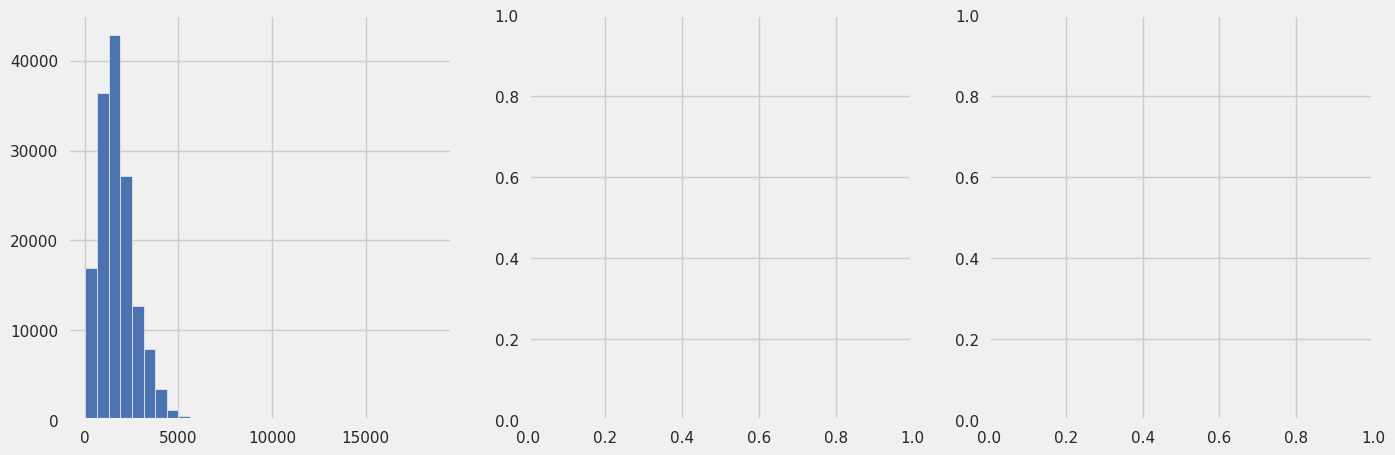

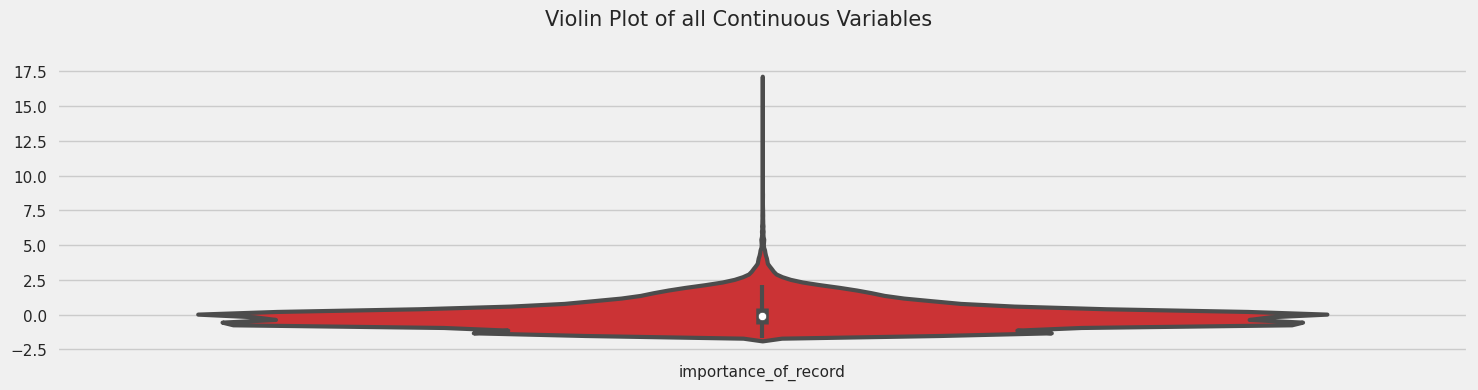

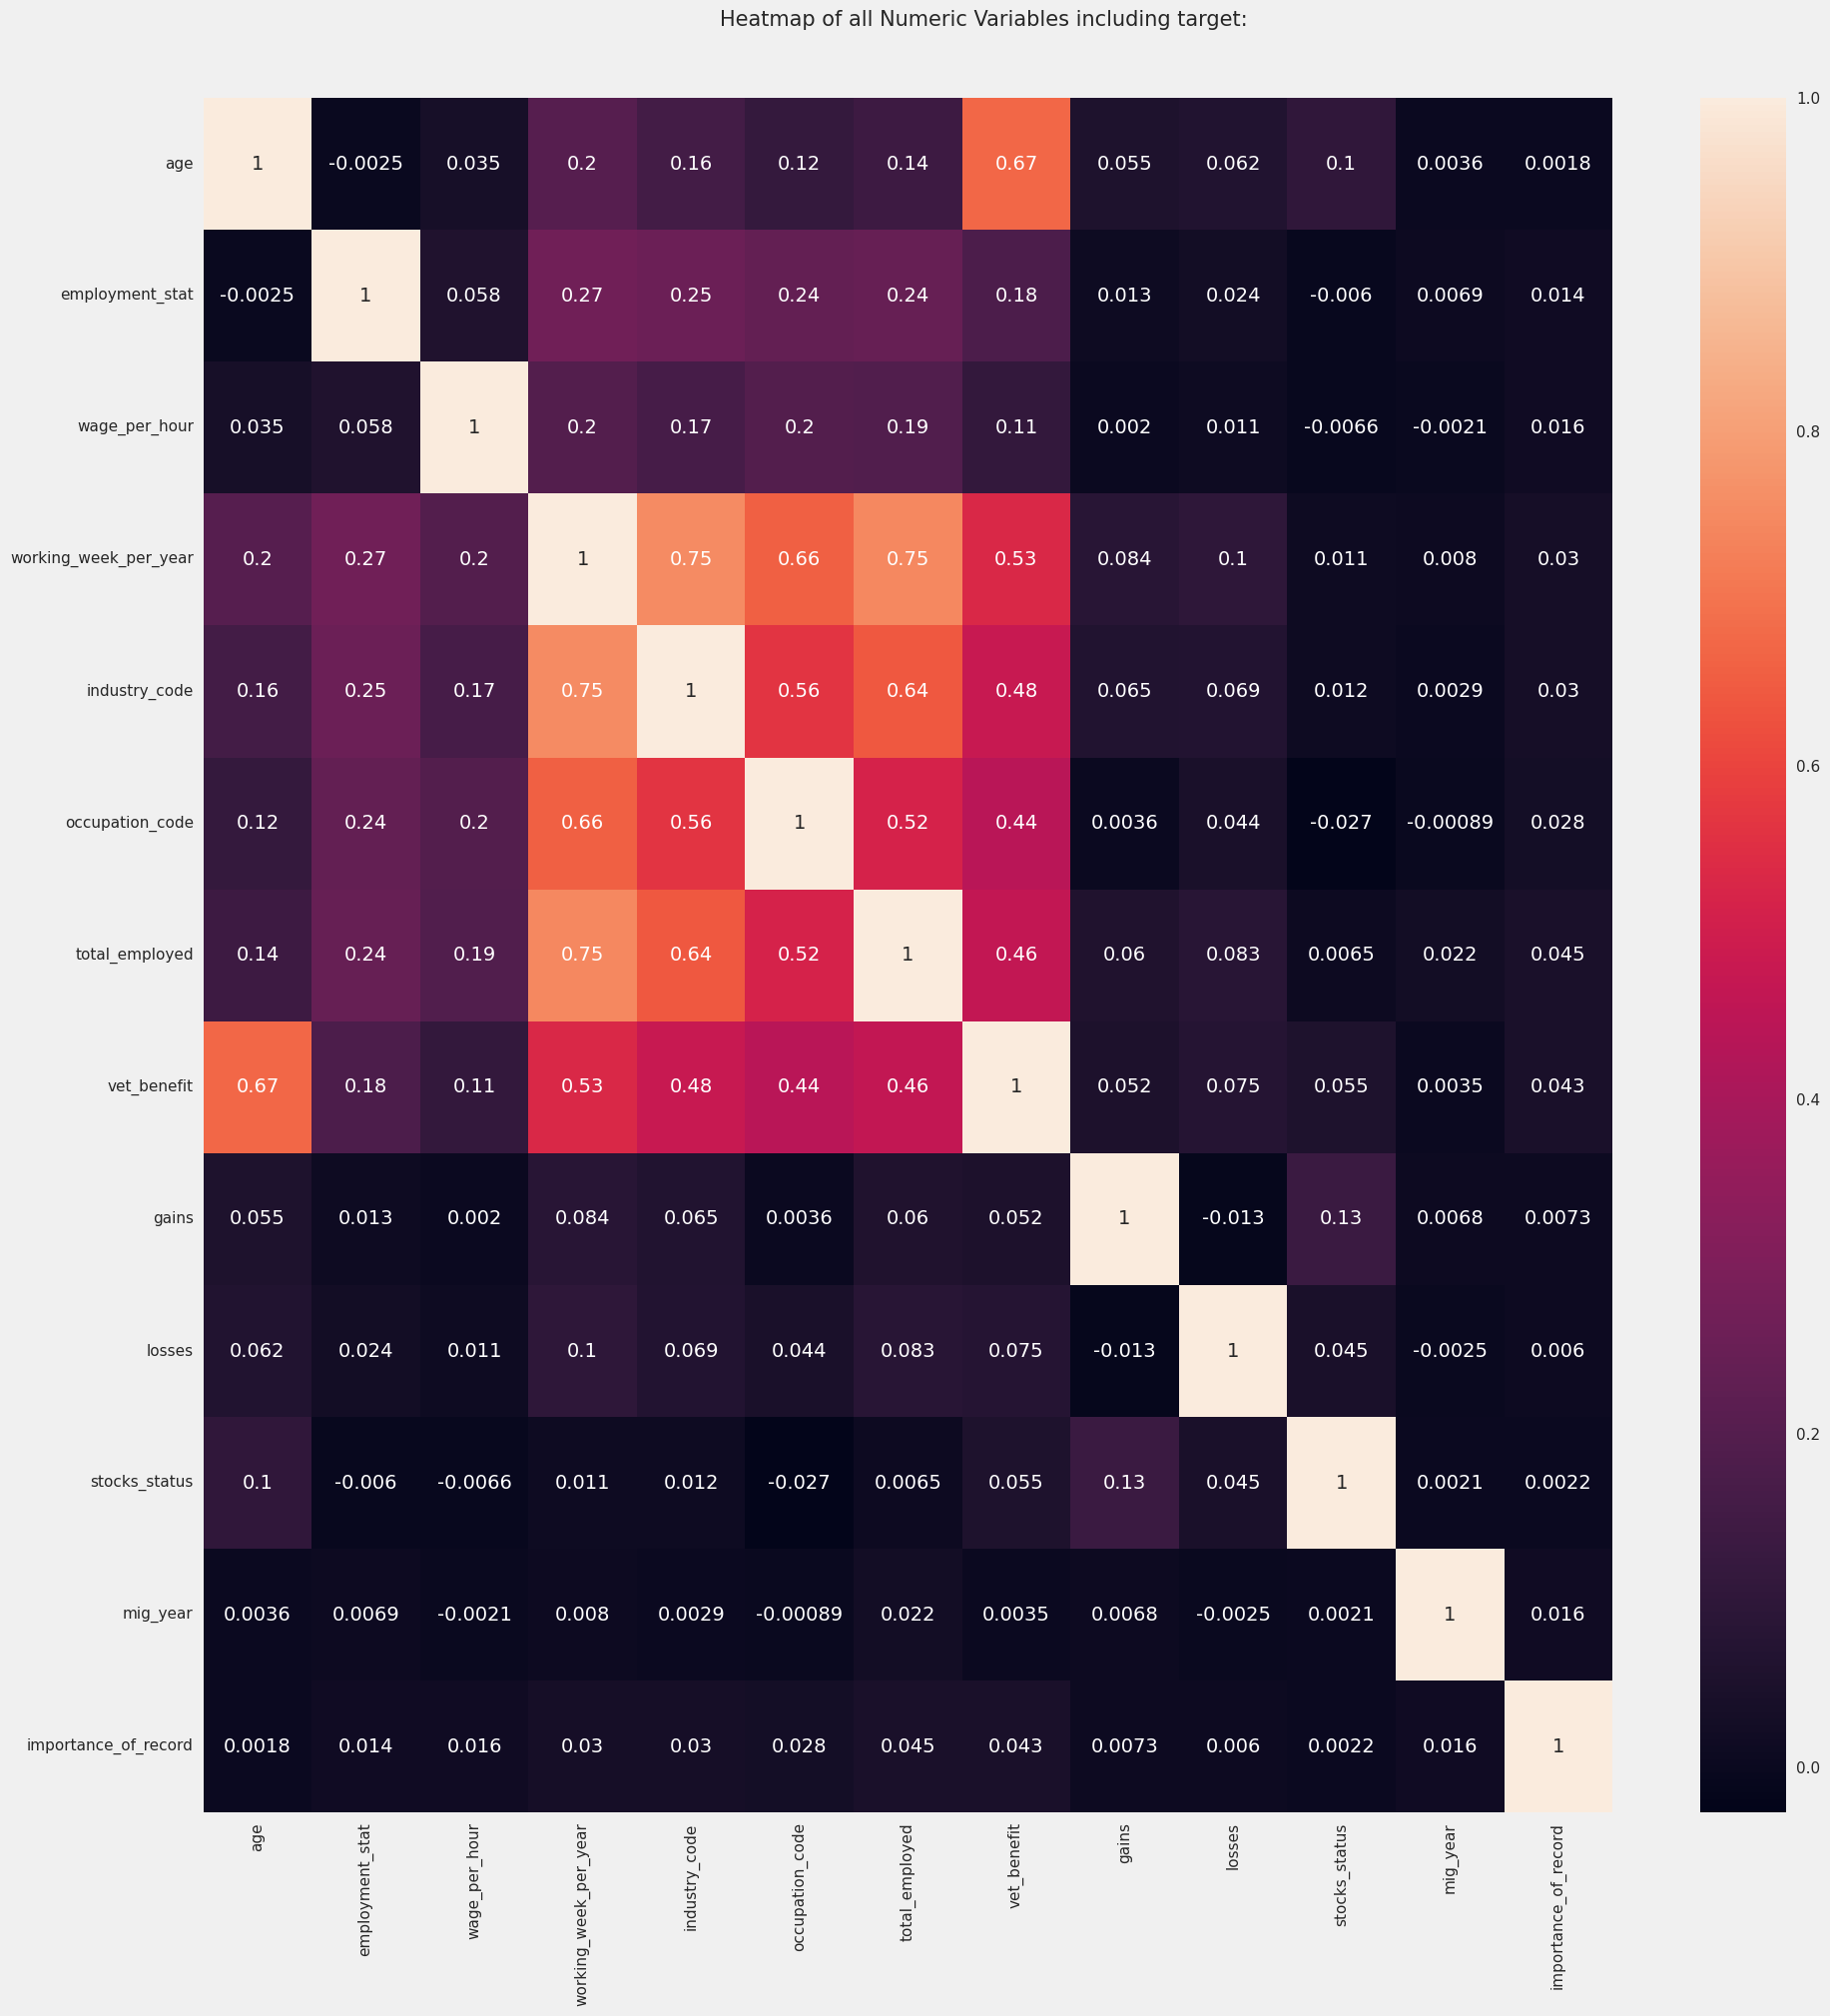

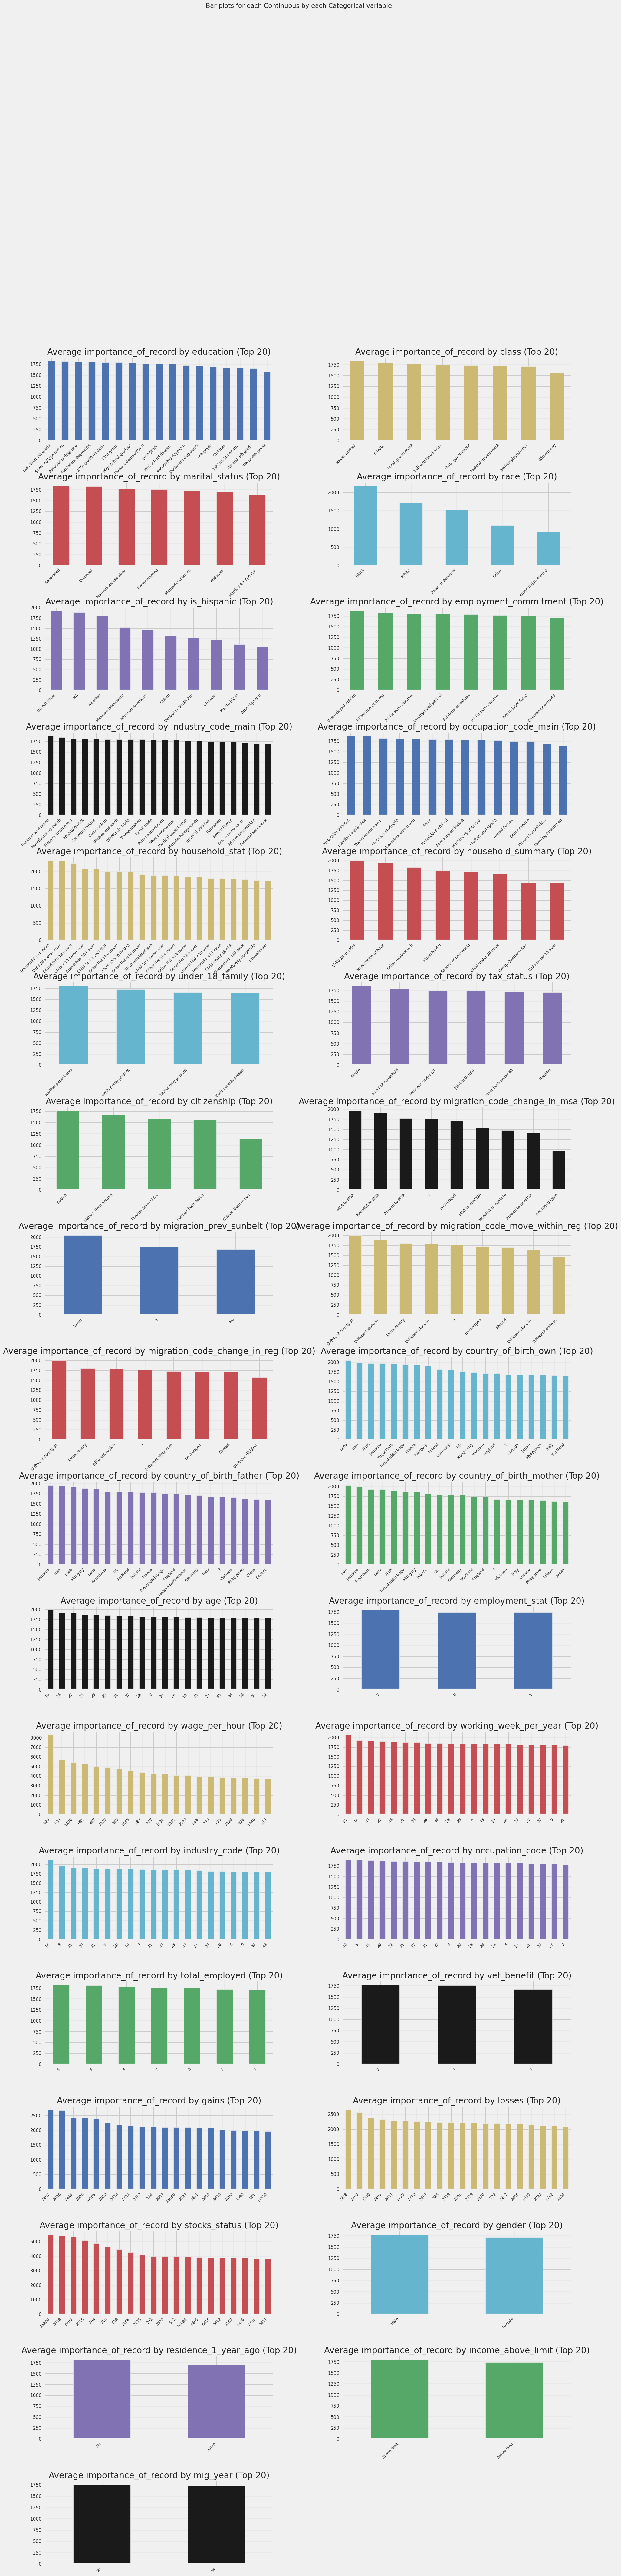

In [93]:
# Install AutoViz if you haven't already
#!pip install autoviz

# Import AutoViz
#from autoviz.AutoViz_Class import AutoViz_Class


AV = AutoViz_Class()

# Specify the file path and name correctly
# You can use an absolute path or a relative path from your script's location
file_path = '/content/drive/MyDrive/Colab_Files/project_2_data.csv'

# Specify the target variable
target_variable = "income_above_limit"

# Perform EDA with AutoViz
report = AV.AutoViz(
    filename= file_path,   # Use the correct file path
    sep=",",
    #depVar=target_variable,
    dfte=None,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
    )




In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

In [95]:
from sklearn.impute import SimpleImputer

# Define the columns with missing values that you want to impute
columns_with_missing = ["class", "education_institute", "unemployment_reason", "is_labor_union",
                        "occupation_code_main", "under_18_family", "veterans_admin_questionnaire",
                        "migration_code_change_in_msa", "migration_prev_sunbelt",
                        "migration_code_move_within_reg", "migration_code_change_in_reg",
                        "residence_1_year_ago", "old_residence_reg", "old_residence_state"]

# Initialize SimpleImputer with the most frequent strategy for specified columns
SI = SimpleImputer(strategy="most_frequent")
data[columns_with_missing] = SI.fit_transform(data[columns_with_missing])

# Check for missing values after imputation
print(data.isna().sum())


ID                                0
age                               0
gender                            0
education                         0
class                             0
education_institute               0
marital_status                    0
race                              0
is_hispanic                       0
employment_commitment             0
unemployment_reason               0
employment_stat                   0
wage_per_hour                     0
is_labor_union                    0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
occupation_code_main              0
total_employed                    0
household_stat                    0
household_summary                 0
under_18_family                   0
veterans_admin_questionnaire      0
vet_benefit                       0
tax_status                        0
gains                             0
losses                      

In [96]:
# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [97]:
# Split the data into features (X) and target (y)
X = data.drop("income_above_limit", axis=1)
y = data["income_above_limit"]


In [98]:

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [100]:
# Model Prediction
y_pred = model.predict(X_test)

In [101]:
# Model Evaluation
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [102]:
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_rep)

F1 Score: 0.9705911525490974

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.15      0.25      2622
           1       0.95      1.00      0.97     39278

    accuracy                           0.94     41900
   macro avg       0.84      0.57      0.61     41900
weighted avg       0.93      0.94      0.93     41900



anothe appracch

In [103]:
def evaluate_model(true, predicted):
    score_f1 = f1_score(true, predicted, average="weighted")
    accuracy = accuracy_score(true, predicted)

    return score_f1, accuracy

In [104]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler  # Add RobustScaler import
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

def fit_classification_models(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create pipelines for XGBoost, RandomForest, and ExtraTrees classifiers
    pipelines = {
        'XGBoost': Pipeline([('scaler', RobustScaler()), ('classifier', XGBClassifier())]),
        'Random Forest': Pipeline([('scaler', RobustScaler()), ('classifier', RandomForestClassifier())]),
        'ExtraTreesClassifier': Pipeline([('scaler', RobustScaler()), ('classifier', ExtraTreesClassifier())]),
    }

    # Fit and evaluate XGBoost, RandomForest, and ExtraTrees classifiers
    results = {}

    for classifier_name, pipeline in pipelines.items():
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")
        results[classifier_name] = {'accuracy': accuracy, 'f1-score': f1}

    return results

results = fit_classification_models(X_train, y_train)


In [78]:
results = fit_classification_models(X_train, y_train)

In [ ]:
results

In [80]:
# Create a DataFrame from the results
df = pd.DataFrame(results).transpose()

# Sort the DataFrame by the F1-score in descending order
df_sorted = df.sort_values(by='f1-score', ascending=False)

# Display the sorted DataFrame
df_sorted

,accuracy,f1-score
XGBoost,0.956205,0.951328
Random Forest,0.955310,0.948721
ExtraTreesClassifier,0.951700,0.943652


,accuracy,f1-score
XGBoost,0.956205,0.951328
Random Forest,0.955310,0.948721
ExtraTreesClassifier,0.951700,0.943652
